In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv("train1.csv")
df_train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [3]:
df_train.shape

(159571, 8)

In [4]:
df_train['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

In [5]:
df_train['highly_malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

In [6]:
df_train['rude'].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

In [7]:
df_train['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

In [8]:
df_train['abuse'].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

In [9]:
df_train['loathe'].value_counts()

0    158166
1      1405
Name: loathe, dtype: int64

In [10]:
df_train.drop('id',axis=1,inplace=True)

In [11]:
df_train.dtypes

comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [12]:
df_train.isnull().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

There are no missing values in the dataset

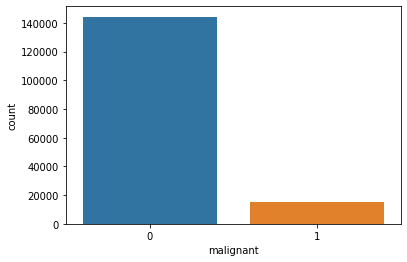

In [13]:
sns.countplot(x='malignant', data=df_train)

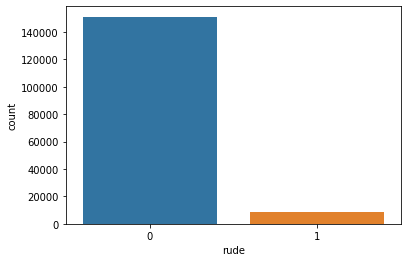

In [14]:
sns.countplot(x='rude', data=df_train)

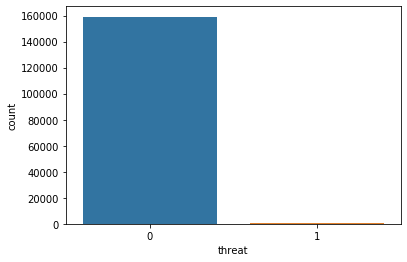

In [15]:
sns.countplot(x='threat', data=df_train)

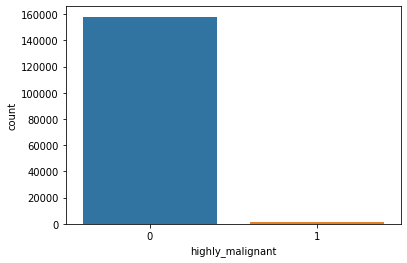

In [16]:
sns.countplot(x='highly_malignant', data=df_train)

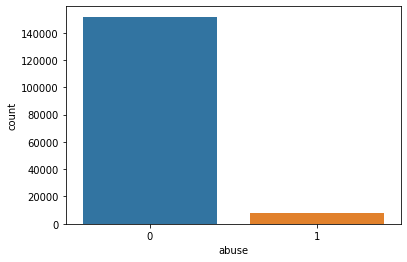

In [17]:
sns.countplot(x='abuse', data=df_train)

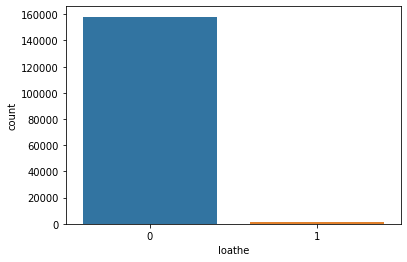

In [18]:
sns.countplot(x='loathe', data=df_train)

There only mimimum number of columns in 'malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe' and remaining all in 0

In [19]:
Good_comment = df_train[(df_train['malignant']!=1) & (df_train['highly_malignant']!=1) & (df_train['rude']!=1) & 
                            (df_train['threat']!=1) & (df_train['abuse']!=1) & (df_train['loathe']!=1)]
percent=len(Good_comment)/len(df_train)*100
print('Percentage of good/neutral comments = ',percent)
print('Percentage of negative comments = ', (100-percent))

Percentage of good/neutral comments =  89.83211235124176
Percentage of negative comments =  10.167887648758239


we only of 10.167% of bad comments in the data which means good comments are more.

In [20]:
#Visualizing the label distribution of comments using pie chart
columns=['malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe']
df_distribution = df_train[columns].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')
df_distribution

,count
threat,478
loathe,1405
highly_malignant,1595
abuse,7877
rude,8449
malignant,15294


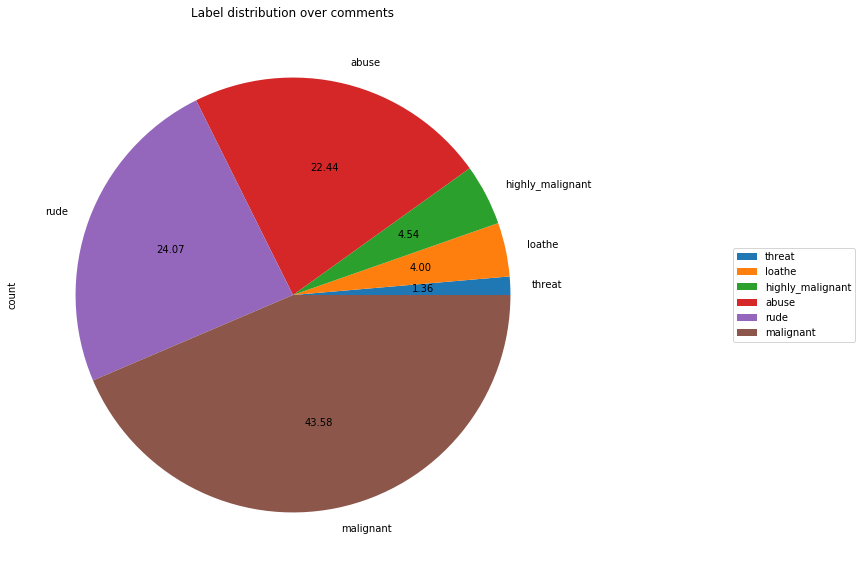

In [21]:
df_distribution.plot.pie(y = 'count', title = 'Label distribution over comments', autopct='%.2f', figsize = (20, 10))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

malignant and rude sentence are high classified and threat, loathe are least classified.

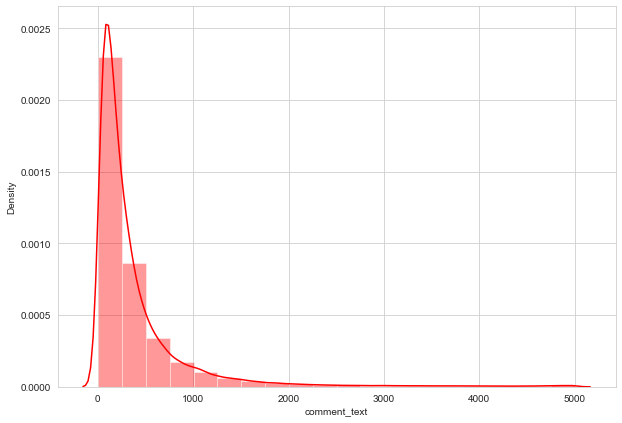

In [22]:
#Distribution of comments length
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
comment_len = df_train.comment_text.str.len()
sns.distplot(comment_len, bins=20, color = 'red')

very few sentences are long but most of the sentences are small

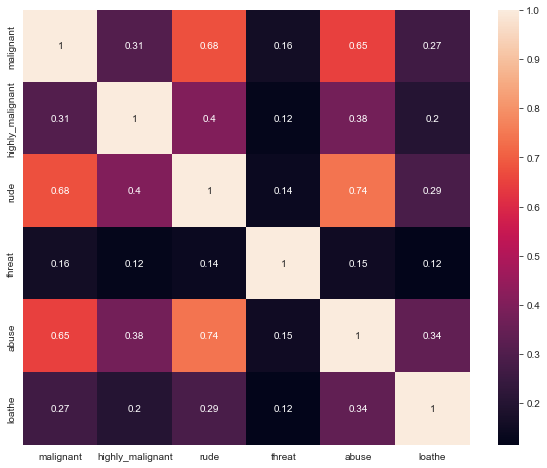

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

1. They more corelations in the variables, Abuse have more corelation with malignant and rude.
2. Rude has more postive corelation with malignant
3. There are no negative corellations in the data.

In [24]:
df_train['label']=df_train[['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']].sum(axis=1)

In [25]:
df_train.head(25)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


1. 0 denotes non of the variables like 'malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe'
2. 1 denotes one amoung these variables and 2 is two among these variables and so on.

In [26]:
df_train['label'].value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: label, dtype: int64

In [27]:
#converting all the lable as 0 and 1, 1 denotes for malignant Comments
df_train['label'] =( df_train['label'] >0).astype(int)
df_train.head(15)    #Checking the data after scaling

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,1
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


In [28]:
df_train['label'].value_counts()

0    143346
1     16225
Name: label, dtype: int64

In [29]:
#Creating a column 'length_before_cleaning' in training dataset
#It represents the length of the each comment respectively in a column 'comment_text' 
df_train['length_before_cleaning'] = df_train['comment_text'].map(lambda comment_text: len(comment_text))
df_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,0,116


In [30]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
#Defining the stop words
stop_words = stopwords.words('english')

#Defining the lemmatizer
lemmatizer = WordNetLemmatizer()

In [32]:
#Replacing '\n' in comment_text
df_train['comment_text'] = df_train['comment_text'].replace('\n',' ')

#Function Definition for using regex operations and other text preprocessing for getting cleaned texts
def clean_comments(text):
    
    #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [33]:
#Calling the above function for the column comment_text in training dataset to replace original with cleaned text
df_train['comment_text'] = df_train['comment_text'].apply(clean_comments)
df_train['comment_text']

0         explanation edits made username hardcore metal...
1         aww match background colour seemingly stuck th...
2         hey man really trying edit war guy constantly ...
3         make real suggestion improvement wondered sect...
4                             sir hero chance remember page
                                ...                        
159566    second time asking view completely contradicts...
159567                 ashamed horrible thing put talk page
159568    spitzer umm there actual article prostitution ...
159569    look like actually put speedy first version de...
159570    really think understand came idea bad right aw...
Name: comment_text, Length: 159571, dtype: object

In [34]:
#Creating a column 'len_after_cleaning'
#Representing the length of the each comment respectively in a column 'comment_text' after cleaning the text.
df_train['len_after_cleaning'] = df_train['comment_text'].map(lambda comment_text: len(comment_text))
df_train.head(20)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,0,264,156
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,0,112,67
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0,233,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,0,622,364
4,sir hero chance remember page,0,0,0,0,0,0,0,67,29
5,congratulation well use tool well talk,0,0,0,0,0,0,0,65,38
6,cocksucker piss around work,1,1,1,0,1,0,1,44,27
7,vandalism matt shirvington article reverted pl...,0,0,0,0,0,0,0,115,57
8,sorry word nonsense offensive anyway intending...,0,0,0,0,0,0,0,472,277
9,alignment subject contrary dulithgow,0,0,0,0,0,0,0,70,36


In [35]:
#Checking Total length removal in train dataset
print("Original Length:", df_train.length_before_cleaning.sum())
print("Cleaned Length:", df_train.len_after_cleaning.sum())
print("Total Words Removed:", (df_train.length_before_cleaning.sum()) - (df_train.len_after_cleaning.sum()))

Original Length: 62893130
Cleaned Length: 38474840
Total Words Removed: 24418290


In [36]:
#Converting the features into number vectors
tf_vec = TfidfVectorizer(max_features = 15000, stop_words='english')

In [37]:
#Let's Separate the input and output variables represented by X and y respectively in train data and convert them
x = tf_vec.fit_transform(df_train['comment_text'])

In [38]:
y =df_train['label']

In [39]:
# Selecting parameters for training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

accu = 0
for i in range(0,500):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .25, random_state = i)
    mod = LogisticRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    if acc> accu:
        accu= acc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")

Best Accuracy 95.87897626149952 found on randomstate 88


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .25, random_state = best_rstate,stratify=y)

In [41]:
#selecting the best model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, cross_validate, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [42]:
def sort_mod(estimator, x_train, y_train, cv=5, verbose=True):
   
    scoring = {"accuracy": "accuracy",
               "precision": "precision_weighted",
               "recall": "recall_weighted",
               "f1": "f1_weighted"}
    scores = cross_validate(estimator, x_train, y_train, cv=cv, scoring=scoring)
    accuracy, accuracy_std = scores['test_accuracy'].mean(),scores['test_accuracy'].std()
    precision, precision_std = scores['test_precision'].mean(),scores['test_precision'].std()
    recall, recall_std = scores['test_recall'].mean(),scores['test_recall'].std()
    f1, f1_std = scores['test_f1'].mean(),scores['test_f1'].std()

    
    ScoRes = {"Accuracy": accuracy,"Accuracy std": accuracy_std,"Precision": precision,"Precision std": precision_std,
              "Recall": recall,"Recall std": recall_std,"f1": f1,"f1 std": f1_std,}
    
    if verbose:
        print(f"Accuracy: {accuracy} - (std: {accuracy_std})")
        print(f"Precision: {precision} - (std: {precision_std})")
        print(f"Recall: {recall} - (std: {recall_std})")
        print(f"f1: {f1} - (std: {f1_std})")

    return ScoRes

In [43]:
models = [LogisticRegression(), RandomForestClassifier(random_state=42),
          DecisionTreeClassifier(random_state=42), ExtraTreeClassifier(random_state=42), 
          AdaBoostClassifier(random_state=42), GradientBoostingClassifier(random_state=42)]

model_names = ["LogisticRegression", "Random Forest",
               "Decision Tree", "Extra Tree", "Ada Boost", 
               "Gradient Boosting"]

In [44]:
accuracy = []
precision = []
recall = []
f1 = []

for model in range(len(models)):
    print(f"\n\nStep {model+1} of {len(models)}")
    print(f".................................running {model_names[model]}")
    
    clf_scores = sort_mod(models[model], x_train, y_train)
    
    accuracy.append(clf_scores["Accuracy"])
    precision.append(clf_scores["Precision"])
    recall.append(clf_scores["Recall"])
    f1.append(clf_scores["f1"])



Step 1 of 6
.................................running LogisticRegression
Accuracy: 0.9546031824716896 - (std: 0.001000916991098957)
Precision: 0.9536887478984036 - (std: 0.0011770902085219178)
Recall: 0.9546031824716896 - (std: 0.001000916991098957)
f1: 0.9501027665582722 - (std: 0.0011609092652119742)


Step 2 of 6
.................................running Random Forest
Accuracy: 0.9558648901073428 - (std: 0.0011086279408438003)
Precision: 0.9536078075158919 - (std: 0.0012351388519715723)
Recall: 0.9558648901073428 - (std: 0.0011086279408438003)
f1: 0.9534483850027964 - (std: 0.0013125730773589656)


Step 3 of 6
.................................running Decision Tree
Accuracy: 0.9403399103269885 - (std: 0.0011932160948344057)
Precision: 0.939876993824473 - (std: 0.0013170179657430794)
Recall: 0.9403399103269885 - (std: 0.0011932160948344057)
f1: 0.9400985021206285 - (std: 0.001250869297529837)


Step 4 of 6
.................................running Extra Tree
Accuracy: 0.920728934983226

In [45]:
df_result = pd.DataFrame({"Model": model_names,
                          "accuracy": accuracy,
                          "precision": precision,
                          "recall": recall,
                          "f1": f1})
df_result.sort_values(by="f1", ascending=False)

,Model,accuracy,precision,recall,f1
1,Random Forest,0.955865,0.953608,0.955865,0.953448
0,LogisticRegression,0.954603,0.953689,0.954603,0.950103
2,Decision Tree,0.940340,0.939877,0.940340,0.940099
4,Ada Boost,0.945353,0.942386,0.945353,0.939511
5,Gradient Boosting,0.940022,0.940399,0.940022,0.929798
3,Extra Tree,0.920729,0.921951,0.920729,0.921303


In [46]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [47]:
clf_rf =  RandomForestClassifier(random_state=42)
clf_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [48]:
y_pred_prob=clf_rf.predict_proba(x_test)
y_pred_prob

array([[0.95      , 0.05      ],
       [0.97730247, 0.02269753],
       [0.97      , 0.03      ],
       ...,
       [0.94      , 0.06      ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [49]:
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)

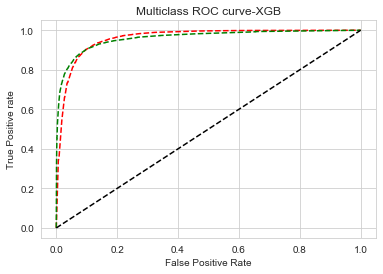

In [50]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')

plt.title('Multiclass ROC curve-XGB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.plot([0,1],[0,1],'k--')
plt.show()

In [51]:
clf_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [52]:
preds = cross_val_predict(clf_rf, x_train, y_train, cv=5, n_jobs=-1)
pd.crosstab(y_train, preds, rownames = ['Real'], colnames =['Predicted'])

Predicted,0,1
Real,,
0,106185,1324
1,3958,8211


In [53]:
print(metrics.classification_report(y_train, preds, zero_division=0))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98    107509
           1       0.86      0.67      0.76     12169

    accuracy                           0.96    119678
   macro avg       0.91      0.83      0.87    119678
weighted avg       0.95      0.96      0.95    119678



In [54]:
import joblib
joblib.dump(clf_rf,"malignant_classifier.obj")

['malignant_classifier.obj']

In [55]:
#importing test tabel.
df_test=pd.read_csv("test1.csv")
df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [56]:
df_test.drop('id',axis=1,inplace=True)
df_test['comment_text'] = df_test['comment_text'].apply(clean_comments)
df_test['comment_text']

0         yo bitch ja rule succesful ever whats hating s...
1                                        rfc title fine imo
2                                source zawe ashton lapland
3         look back source information updated correct f...
4                                  anonymously edit article
                                ...                        
153159                totally agree stuff nothing long crap
153160    throw field home plate get faster throwing cut...
153161    okinotorishima category see change agree corre...
153162    one founding nation eu germany law return quit...
153163    stop already bullshit welcome fool think kind ...
Name: comment_text, Length: 153164, dtype: object

In [57]:
x_test = tf_vec.fit_transform(df_test['comment_text'])

In [58]:
Malignant_classifier= joblib.load('malignant_classifier.obj')
predi= Malignant_classifier.predict(x_test)

In [60]:
Predicted=pd.DataFrame({"Malignant_classifier":predi})
Predicted.head()

,Malignant_classifier
0,0
1,0
2,0
3,0
4,0


In [62]:
Predicted.to_csv("malignant_classifier_predicted.csv")